# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [424]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
from config import key
from nltk.corpus import reuters, stopwords



%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/amiraali/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [425]:
# Read your api key environment variable
load_dotenv()
api_key = key

Python-dotenv could not parse statement starting at line 2
Python-dotenv could not parse statement starting at line 7


In [426]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key) 

In [427]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything("bitcoin",sort_by="relevancy", language="en")

btc_headlines

{'status': 'ok',
 'totalResults': 9879,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Arielle Pardes',
   'title': 'Miami’s Bitcoin Conference Left a Trail of Harassment',
   'description': 'For some women, inappropriate conduct from other conference-goers continued to haunt them online.',
   'url': 'https://www.wired.com/story/bitcoin-2022-conference-harassment/',
   'urlToImage': 'https://media.wired.com/photos/627a89e3e37e715cb7d760d2/191:100/w_1280,c_limit/Bitcoin_Miami_Biz_GettyImages-1239817123.jpg',
   'publishedAt': '2022-05-10T16:59:46Z',
   'content': 'Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]'},
  {'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Justine Calma',
   'title': 'Why fossil fuel companies see green in Bitcoin mining projects',
   'description': 'Exxo

In [428]:
# Fetch the Ethereum news articles
eth_headlines=newsapi.get_everything("ethereum",sort_by="relevancy", language="en")
eth_headlines

{'status': 'ok',
 'totalResults': 4646,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Jon Fingas',
   'title': "Here's what NFTs look like on Instagram",
   'description': "Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital wallet and posting for the world to see. If you like, the social …",
   'url': 'https://www.engadget.com/instagram-nft-details-131020868.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2022-05/2546c160-d05e-11ec-b75e-e45eaa8c5b2b',
   'publishedAt': '2022-05-10T13:10:20Z',
   'content': "Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars]"},
  {'source': {'id': None, 'name': 'The Guardian'},
   'author': 'Alex H

In [429]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments=[]

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

bitcoin_df=pd.DataFrame(bitcoin_sentiments)
cols=["date","text","compound","positive","negative","neutral"]
bitcoin_df=bitcoin_df[cols]
bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882
2,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772
3,2022-05-16,"As a kid, I remember when my father tried to u...",0.3818,0.114,0.052,0.833
4,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928


In [431]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments=[]

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

ethereum_df=pd.DataFrame(ethereum_sentiments)
cols=["date","text","compound","positive","negative","neutral"]
ethereum_df=ethereum_df[cols]
ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865
1,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879
2,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945
3,2022-04-26,April 26 (Reuters) - Ether has promised to do ...,0.5346,0.142,0.000,0.858
4,2022-04-26,Ethereum is preparing for an upgrade thats bee...,0.2716,0.065,0.000,0.935


In [432]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.000000
mean,-0.093390,0.059450,0.08045,0.860050
std,0.389782,0.062439,0.07613,0.104336
min,-0.859300,0.000000,0.00000,0.557000
25%,-0.366350,0.000000,0.05350,0.827000
50%,-0.190100,0.048000,0.06300,0.888000
75%,0.152575,0.085000,0.08425,0.930250
max,0.750600,0.202000,0.30000,0.964000


In [433]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.029180,0.045900,0.049450,0.904800
std,0.402413,0.059923,0.043592,0.052498
min,-0.690800,0.000000,0.000000,0.822000
25%,-0.284450,0.000000,0.000000,0.858750
50%,-0.189700,0.000000,0.059000,0.925500
75%,0.288700,0.073000,0.069000,0.937000
max,0.690800,0.178000,0.178000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score at 0.07210 compared to Ethereum's 0.053050.

Q: Which coin had the highest compound score?

A: Bitcoin had a higher mean compound score at 0.039835. Since this falls within the +0.05 to -0.05 range, the sentiment is neutral. Whereas for Ethereum, the compound score is less than -0.05, indicating a negative sentiment.

Q. Which coin had the highest positive score?

A: Bitcoin had an overall higher positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [434]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import reuters, stopwords
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [435]:
# Instantiate the lemmatizer
lemmatizer=WordNetLemmatizer()

# Create a list of stopwords
stopw=["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [436]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    #sw = set(stopwords.words('english')+stopw)
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    words=[word.lower() for word in words if word.lower() not in stopw]
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    return lem


In [437]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokenizer']=bitcoin_df['text'].apply(tokenizer)
bitcoin_df

,date,text,compound,positive,negative,neutral,tokenizer
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964,"[even, though, number, womenfocused, crypto, s..."
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882,"[bitcoin, mining, site, powered, otherwise, lo..."
2,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772,"[warren, buffett, always, bitcoin, skeptic, bi..."
3,2022-05-16,"As a kid, I remember when my father tried to u...",0.3818,0.114,0.052,0.833,"[kid, remember, father, tried, use, broom, han..."
4,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928,"[image, source, getty, imagesthe, value, bitco..."
5,2022-05-05,If youve ever felt like introducing some Vegas...,0.7506,0.193,0.000,0.807,"[youve, ever, felt, like, introducing, vegasst..."
6,2022-05-06,Cryptocurrency mixers are sometimes used to he...,-0.4404,0.202,0.241,0.557,"[cryptocurrency, mixer, sometimes, used, help,..."
7,2022-05-10,Posted \r\nFrom Bitcoin's dramatic drop to a n...,-0.3612,0.000,0.123,0.877,"[posted, bitcoins, dramatic, drop, new, way, p..."
8,2022-05-11,"May 11 (Reuters) - Bitcoin fell 7.23% to $28,7...",-0.3818,0.000,0.077,0.923,"[may, reuters, bitcoin, fell, gmt, wednesday, ..."
9,2022-05-04,"May 4 (Reuters) - Bitcoin rose 5.7% to $39,862...",-0.2732,0.000,0.063,0.937,"[may, reuters, bitcoin, rose, wednesday, addin..."


In [438]:
# Create a new tokens column for Ethereum
ethereum_df['tokenizer']=ethereum_df['text'].apply(tokenizer)
ethereum_df

,date,text,compound,positive,negative,neutral,tokenizer
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865,"[meta, revealed, nfts, work, instagram, usbase..."
1,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879,"[multibillion, dollar, cryptocurrency, company..."
2,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945,"[bored, ape, yacht, club, creator, yuga, lab, ..."
3,2022-04-26,April 26 (Reuters) - Ether has promised to do ...,0.5346,0.142,0.000,0.858,"[april, reuters, ether, promised, better, prom..."
4,2022-04-26,Ethereum is preparing for an upgrade thats bee...,0.2716,0.065,0.000,0.935,"[ethereum, preparing, upgrade, thats, describe..."
5,2022-05-01,There's a new metaverse project from the creat...,-0.2732,0.000,0.063,0.937,"[there, new, metaverse, project, creator, bore..."
6,2022-05-09,Editorial IndependenceWe want to help you make...,0.6908,0.178,0.000,0.822,"[editorial, independencewe, want, help, make, ..."
7,2022-05-09,"40 days ago Bitcoin sold for $47,454. It's pri...",-0.6908,0.000,0.178,0.822,"[day, ago, bitcoin, sold, price, drop, third, ..."
8,2022-05-15,When Nvidia launched its Ampere Lite Hash Rate...,-0.3818,0.069,0.085,0.847,"[nvidia, launched, ampere, lite, hash, rate, l..."
9,2022-05-04,"May 4 (Reuters) - Bitcoin rose 5.7% to $39,862...",-0.2732,0.000,0.063,0.937,"[may, reuters, bitcoin, rose, wednesday, addin..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [439]:
from collections import Counter
from nltk import ngrams

In [440]:
# Generate the Bitcoin N-grams where N=2
btc_counts = [Counter(ngrams(texts, n=2)) for text in bitcoin_df['tokenizer']]
print(btc_counts)

[Counter({('image', 'source'): 1, ('source', 'getty'): 1, ('getty', 'imagesthe'): 1, ('imagesthe', 'value'): 1, ('value', 'bitcoin'): 1, ('bitcoin', 'continued'): 1, ('continued', 'fall'): 1, ('fall', 'weekend'): 1, ('weekend', 'dropped'): 1, ('dropped', 'according'): 1, ('according', 'coinbase'): 1, ('coinbase', 'cryptocurrency'): 1, ('cryptocurrency', 'exchangethe'): 1, ('exchangethe', 'world'): 1, ('world', 'largest'): 1, ('largest', 'cryp'): 1, ('cryp', 'char'): 1}), Counter({('image', 'source'): 1, ('source', 'getty'): 1, ('getty', 'imagesthe'): 1, ('imagesthe', 'value'): 1, ('value', 'bitcoin'): 1, ('bitcoin', 'continued'): 1, ('continued', 'fall'): 1, ('fall', 'weekend'): 1, ('weekend', 'dropped'): 1, ('dropped', 'according'): 1, ('according', 'coinbase'): 1, ('coinbase', 'cryptocurrency'): 1, ('cryptocurrency', 'exchangethe'): 1, ('exchangethe', 'world'): 1, ('world', 'largest'): 1, ('largest', 'cryp'): 1, ('cryp', 'char'): 1}), Counter({('image', 'source'): 1, ('source', 'gett

In [441]:
# Generate the Ethereum N-grams where N=2
eth_counts = [Counter(ngrams(texts, n=2)) for text in ethereum_df['tokenizer']]
print(eth_counts)

[Counter({('image', 'source'): 1, ('source', 'getty'): 1, ('getty', 'imagesthe'): 1, ('imagesthe', 'value'): 1, ('value', 'bitcoin'): 1, ('bitcoin', 'continued'): 1, ('continued', 'fall'): 1, ('fall', 'weekend'): 1, ('weekend', 'dropped'): 1, ('dropped', 'according'): 1, ('according', 'coinbase'): 1, ('coinbase', 'cryptocurrency'): 1, ('cryptocurrency', 'exchangethe'): 1, ('exchangethe', 'world'): 1, ('world', 'largest'): 1, ('largest', 'cryp'): 1, ('cryp', 'char'): 1}), Counter({('image', 'source'): 1, ('source', 'getty'): 1, ('getty', 'imagesthe'): 1, ('imagesthe', 'value'): 1, ('value', 'bitcoin'): 1, ('bitcoin', 'continued'): 1, ('continued', 'fall'): 1, ('fall', 'weekend'): 1, ('weekend', 'dropped'): 1, ('dropped', 'according'): 1, ('according', 'coinbase'): 1, ('coinbase', 'cryptocurrency'): 1, ('cryptocurrency', 'exchangethe'): 1, ('exchangethe', 'world'): 1, ('world', 'largest'): 1, ('largest', 'cryp'): 1, ('cryp', 'char'): 1}), Counter({('image', 'source'): 1, ('source', 'gett

In [442]:
corpus=bitcoin_df['tokenizer']
corpus

0     [even, though, number, womenfocused, crypto, s...
1     [bitcoin, mining, site, powered, otherwise, lo...
2     [warren, buffett, always, bitcoin, skeptic, bi...
3     [kid, remember, father, tried, use, broom, han...
4     [image, source, getty, imagesthe, value, bitco...
5     [youve, ever, felt, like, introducing, vegasst...
6     [cryptocurrency, mixer, sometimes, used, help,...
7     [posted, bitcoins, dramatic, drop, new, way, p...
8     [may, reuters, bitcoin, fell, gmt, wednesday, ...
9     [may, reuters, bitcoin, rose, wednesday, addin...
10    [april, reuters, bitcoin, dropped, tuesday, pr...
11    [btc, fell, lowest, level, since, last, july, ...
12    [may, reuters, bitcoin, dropped, gmt, monday, ...
13    [mexican, restaurant, north, london, week, ago...
14    [may, reuters, bitcoin, scant, experience, ris...
15    [central, african, republic, adopted, bitcoin,...
16    [two, linked, cryptocurrencies, collapsed, bec...
17    [sam, bankmanfried, founder, digital, asse

In [443]:
corpus=tokenizer(bitcoin_df.text.str.cat())

In [444]:
Counter=Counter(corpus)
top10= Counter.most_common(10)
print(top10)

[('bitcoin', 13), ('cryptocurrency', 12), ('world', 7), ('week', 5), ('reuters', 5), ('investor', 4), ('dropped', 4), ('previous', 4), ('closebitcoin', 4), ('biggest', 4)]


In [445]:
# Use token_count to get the top 10 words for Ethereum
corp_eth=tokenizer(ethereum_df.text.str.cat())

In [446]:
from collections import Counter
Counter1 = Counter(corp_eth)
top_eth = Counter1.most_common(10)
print(top_eth)

[('cryptocurrency', 10), ('bitcoin', 8), ('world', 7), ('biggest', 5), ('reuters', 5), ('last', 5), ('ethereum', 4), ('nft', 4), ('week', 4), ('previous', 4)]


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [447]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [448]:
# Code to download wordnet corpora
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/amiraali/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

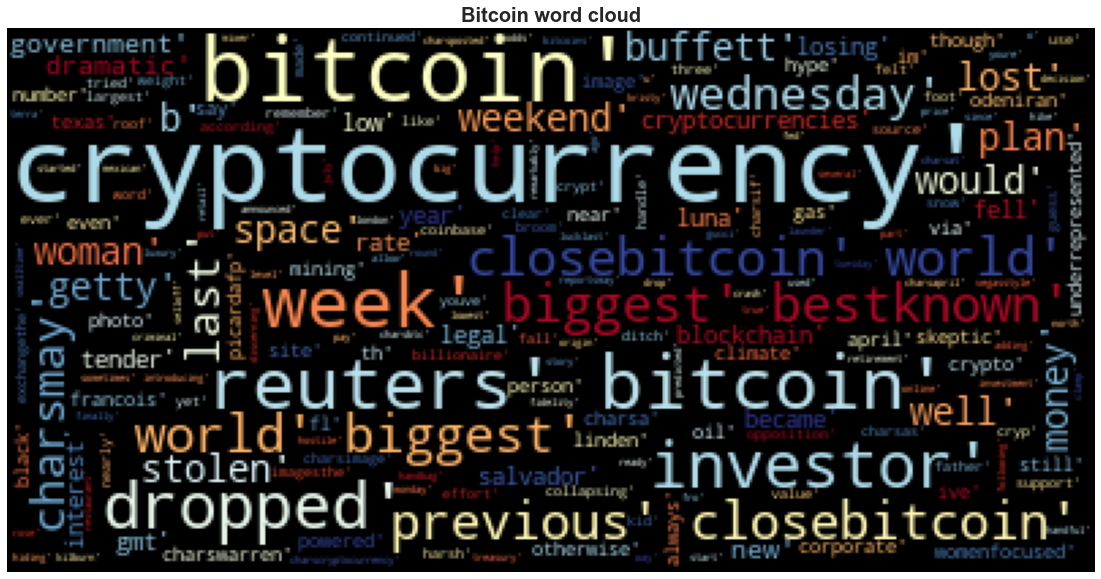

In [449]:
# Generate the Bitcoin word cloud
terms_list = str(corpus)

# Create the word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Bitcoin word cloud", fontdict=fontdict)
plt.show()

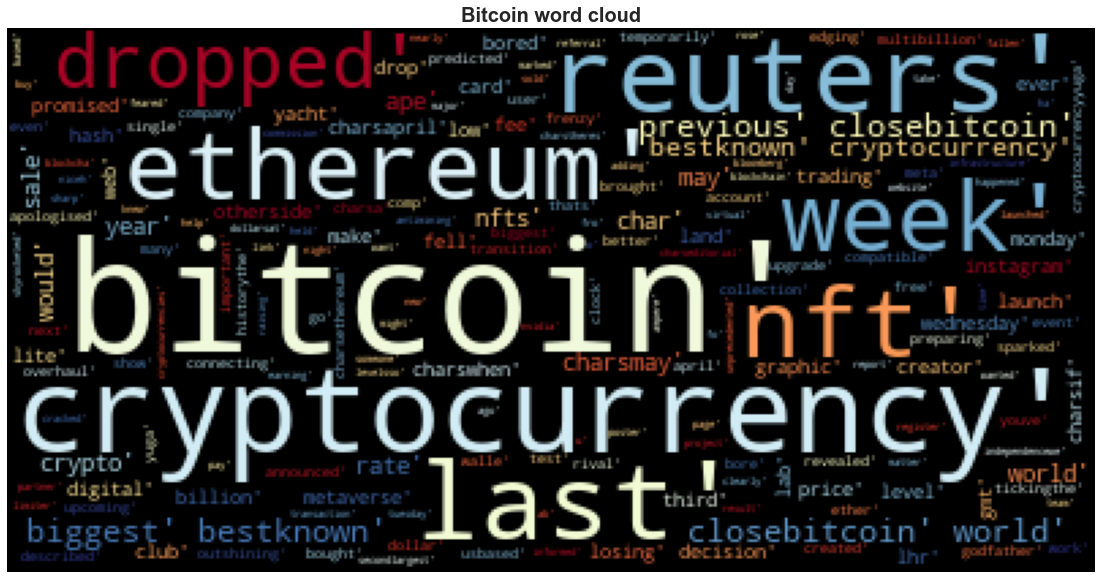

In [450]:
# Generate the Ethereum word cloud
terms_list = str(corp_eth)

# Create the word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Bitcoin word cloud", fontdict=fontdict)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [451]:
import spacy
from spacy import displacy

In [452]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 7.6 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [453]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [454]:
# Concatenate all of the Bitcoin text together
bner=bitcoin_df.text.str.cat()
bner

"Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]A Bitcoin mining site powered by otherwise lost gas from an oil well near Linden, Texas, on April 4th, 2022. | Photo by FRANCOIS PICARD/AFP via Getty Images\r\n\n \n\n Of all the corporate climate hype fl… [+6544 chars]Warren Buffett has always been a bitcoin skeptic. But the billionaire investor had his most harsh words yet for the cryptocurrency over the weekend. Buffett made it clear that his opposition to crypt… [+2297 chars]As a kid, I remember when my father tried to use a broom handle in a last ditch effort to support a roof that was collapsing from the weight of nearly three feet of snow. You can guess how well that … [+3390 chars]Image source, Getty Images\r\nThe value of Bitcoin continued to fall over the weekend as it dropped below $34,000 (£27,630), according to 

In [455]:
# Run the NER processor on all of the text
btcner=nlp(bner)

In [456]:
# Render the visualization
displacy.render(btcner, style='ent')

In [457]:
# List all Entities
labels = [x.label_ for x in btcner.ents]
Counter(labels)

Counter({'GPE': 5,
         'DATE': 19,
         'PERSON': 8,
         'ORG': 17,
         'QUANTITY': 1,
         'MONEY': 12,
         'PERCENT': 9,
         'WORK_OF_ART': 2,
         'CARDINAL': 3,
         'NORP': 2,
         'LOC': 1,
         'ORDINAL': 2})

---

### Ethereum NER

In [458]:
# Concatenate all of the Ethereum text together
ener=ethereum_df.text.str.cat()
ener

'Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you\'ve bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars]A multi-billion dollar cryptocurrency company has apologised to users after its sale of metaverse land sparked a frenzy that temporarily brought down the Ethereum cryptocurrency.\r\nYuga Labs, the comp… [+3475 chars]When Bored Ape Yacht Club creators Yuga Labs announced its Otherside NFT collection would launch on April 30, it was predicted by many to be the biggest NFT launch ever. Otherside is an upcoming Bore… [+6669 chars]April 26 (Reuters) - Ether has promised to do better. It has promised to go to the next level, edging out crypto rivals and even outshining the godfather, bitcoin. But the clock\'s ticking.\r\nThe No.2 … [+4092 chars]Ethereum is preparing for an upgrade thats been described as the single most important event in crypto history.\r\nThe transition would o

In [459]:
# Run the NER processor on all of the text
ethner=nlp(ener)

In [460]:
# Render the visualization
displacy.render(ethner, style='ent')

In [461]:
# List all Entities
labels = [x.label_ for x in ethner.ents]
Counter(labels)

Counter({'ORG': 23,
         'GPE': 2,
         'PERSON': 4,
         'LAW': 1,
         'DATE': 18,
         'CARDINAL': 5,
         'ORDINAL': 2,
         'TIME': 1,
         'MONEY': 16,
         'NORP': 1,
         'WORK_OF_ART': 3,
         'PERCENT': 9})

---